<img src="../images/GeoCAT_logo.png" width=400 alt="GeoCAT Logo"></img>

# Plotting with GeoCAT-viz

---

## Learning Objectives
- Know what GeoCAT-viz is and how it can be useful to you

## Prerequisites


| Concepts | Importance |
| --- | --- |
| Basic familiarity with NumPy | Necessary |
| Basic familiarity with Matplotlib | Necessary |
| Basic familiarity with Cartopy | Helpful |
| Basic familiarity with Xarray | Helpful |

- **Time to learn**: *15-20 minutes*


---

<div class="admonition alert alert-danger">
   
This notebook demonstrates geocat-viz functionality not officially released as of the time of this tutorial. 

</div>

## Imports

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [7]:
# geocat specific imports
from geocat.viz import contourf
from geocat.viz import taylor
from geocat.viz import cmaps as gvcmaps
import geocat.datafiles as gdf

## Get the data we want to use

Using geocat-datafiles again, pull the data we're going to use

In [10]:
# Open a netCDF data file using xarray default engine and load the data into xarray
ds = xr.open_dataset(gdf.get("netcdf_files/uv300.nc")).isel(time=1)

## Example 1: Contours

### Recreating an NCL Contour Plot without GeoCAT-viz

The GeoCAT-examples repository's primary goal is to show that python *can* recreate NCL functionality, but this often ends up creating longer scripts.

The first goal of geocat-viz created reusable utility functions that aim to make some of the NCL formatting easier. 

Below is an example from the GeoCAT-examples repository, [NCL_color_1](https://geocat-examples.readthedocs.io/en/latest/gallery/Contours/NCL_color_1.html#sphx-glr-gallery-contours-ncl-color-1-py) using the data we pulled in above and that uses some of the geocat-viz utility functions

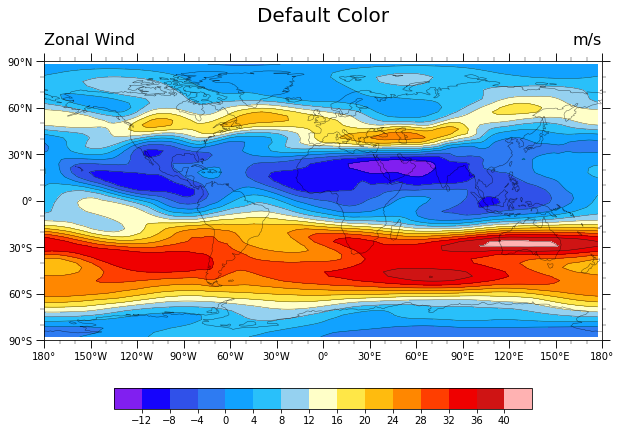

In [15]:
# Open a netCDF data file using xarray default engine and load the data into xarray
ds = xr.open_dataset(gdf.get("netcdf_files/uv300.nc")).isel(time=1)

# Generate figure and set its size in (width, height)
fig = plt.figure(figsize=(10, 8))

# Generate axes using Cartopy to draw coastlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5, alpha=0.6)

# Use geocat.viz.util convenience function to set axes limits & tick values
gvutil.set_axes_limits_and_ticks(ax,
                                 xlim=(-180, 180),
                                 ylim=(-90, 90),
                                 xticks=np.linspace(-180, 180, 13),
                                 yticks=np.linspace(-90, 90, 7))

# Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax, labelsize=10)

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
gvutil.add_lat_lon_ticklabels(ax)

# Import the default color map
newcmp = gvcmaps.ncl_default

# Define contour levels
levels = np.arange(-16, 48, 4)

# Define dictionary for kwargs
kwargs = dict(
    levels=levels,
    xticks=np.arange(-180, 181, 30),  # nice x ticks
    yticks=np.arange(-90, 91, 30),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
)

# Contouf-plot U data (for filled contours)
fillplot = ds.U.plot.contourf(ax=ax, cmap=newcmp, **kwargs)

# Create horizonal color bar
# By changing the kwarg `pad`, the colorbar can be moved closer to or farther away from
# the axis parallel to it.
# `pad` defaults to 0.15 for horizontal colorbars
fig.colorbar(fillplot,
             orientation="horizontal",
             ticks=np.arange(-12, 44, 4),
             label='',
             shrink=0.75,
             pad=0.11)

# Plot line contours
ds.U.plot.contour(ax=ax,
                  colors='black',
                  alpha=0.8,
                  linewidths=0.4,
                  linestyles='solid',
                  add_labels=False,
                  levels=levels,
                  transform=ccrs.PlateCarree())

# Use geocat.viz.util convenience function to add titles to left and right of the plot axis.
gvutil.set_titles_and_labels(ax,
                             maintitle="Default Color",
                             lefttitle=ds.U.long_name,
                             lefttitlefontsize=16,
                             righttitle=ds.U.units,
                             righttitlefontsize=16,
                             xlabel="",
                             ylabel="")

# Show the plot
plt.show()

### Recreating the same plot with GeoCAT-viz

<div class="admonition alert alert-danger">
   
This is unreleased functionality

</div>

From our previous matplotlib tutorial, you might suspect that this is more lines than technically needed to create a plot that accurately displays the information we want. 

The secondary goal of geocat-viz is to create plotting functions based on matplotlib that can make an estimation of NCL style plots. These functions may not exactly recreate the NCL example scripts, but provide a user-friendly way to make NCL style plots.

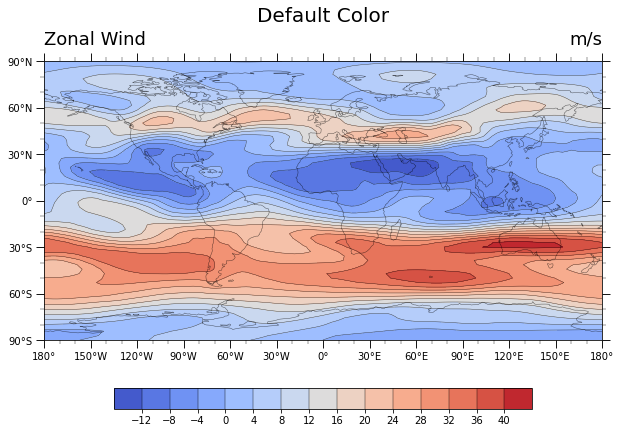

In [27]:
projection = ccrs.PlateCarree()
levels = np.arange(-16, 48, 4)

contourf.Contour(
    ds.U,
    flevels=levels,
    clevels=levels,
    xlim=(-180, 180),
    ylim=(-90, 90),
    xticks=np.linspace(-180, 180, 13),
    yticks=np.linspace(-90, 90, 7),
    projection=projection,
    maintitle="Default Color",
    lefttitle=ds.U.long_name,
    righttitle=ds.U.units,
)

plt.show()

## Example 2: Taylor Diagrams

<div class="admonition alert alert-warning">
   
This functionality will be officially released in the September GeoCAT release

</div>

The GeoCAT development of Taylor diagrams started with an [example request issue](https://github.com/NCAR/GeoCAT-examples/issues/323) created on geocat-examples.

As we looked in to making an example of this type of plot, we discovered that there wasn't a good way to create this type of plot using vanilla matplotlib.

### A Taylor Diagram Primer

In [ ]:
Taylor diagrams are